# SPY strategies



<font size="3"> In this exercise we will evaluate how three different strategies would have performed in the market over the past ~20 years, inclusive of all transaction/holding costs if one was to invest with Webull Securities. We will also perform the exercise again at the end excluding all transaction/holding costs.

Strategies:

- Buy and Hold 
- Buy at Open and Sell at Close
- Buy at Close and Sell at Open

    
All data is obtained from Yahoo Finance and dividends and stock splits are ignored.
</font>

# Table of contents

* [Data Handling](#chapter1)
* [Strategies (wtih txn costs)](#chapter2)
    * [Buy and Hold](#2.1)
    * [Buy at Open and Sell at Close](#2.2)
    * [Buy at Close and Sell at Open](#2.3)
    * [Performance](#2.4) 
* [Strategies (wtihout txn costs)](#chapter3)
    * [Buy and Hold](#3.1)
    * [Buy at Open and Sell at Close](#3.2)
    * [Buy at Close and Sell at Open](#3.3)
    * [Performance](#3.4)

## Data Handling <a id="chapter1"></a>

In [368]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

SPY data (Jan 1993 - Jun 2024) obtained from yahoo finance obtained at https://finance.yahoo.com/quote/SPY/history/ 

In [369]:
SPY = pd.read_csv('SPY.csv')
SPY.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.763744,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,24.939867,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,24.992701,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.256908,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.362572,531500


In [370]:
SPY['Date'] = pd.to_datetime(SPY['Date'])  # Convert 'Date' column to datetime
SPY = SPY.set_index('Date')

In [371]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7902 entries, 1993-01-29 to 2024-06-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7902 non-null   float64
 1   High       7902 non-null   float64
 2   Low        7902 non-null   float64
 3   Close      7902 non-null   float64
 4   Adj Close  7902 non-null   float64
 5   Volume     7902 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 432.1 KB


In [372]:
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500
...,...,...,...,...,...,...
2024-06-11,534.070007,537.010010,532.049988,536.950012,536.950012,36383400
2024-06-12,541.630005,544.119995,540.299988,541.359985,541.359985,63251300
2024-06-13,543.150024,543.330017,539.590027,542.450012,542.450012,44760900


## Strategies (with txn costs) <a id="chapter2"></a>

For all three strategies, we will start with USD10,000.00 capital and assume that fractional investing is possible.

### Buy and Hold <a id="2.1"></a>

For this strategy, we allocate 100% of remaining capital to buy SPY at the open on the first trading day of our dataset (29 Jan 1993) and close the position on the last trading day of our dataset (17 Jun 2024). Given that Webull has no custodian fee, we assume the cost of such a strategy is zero. Below are the various transaction fees involved:

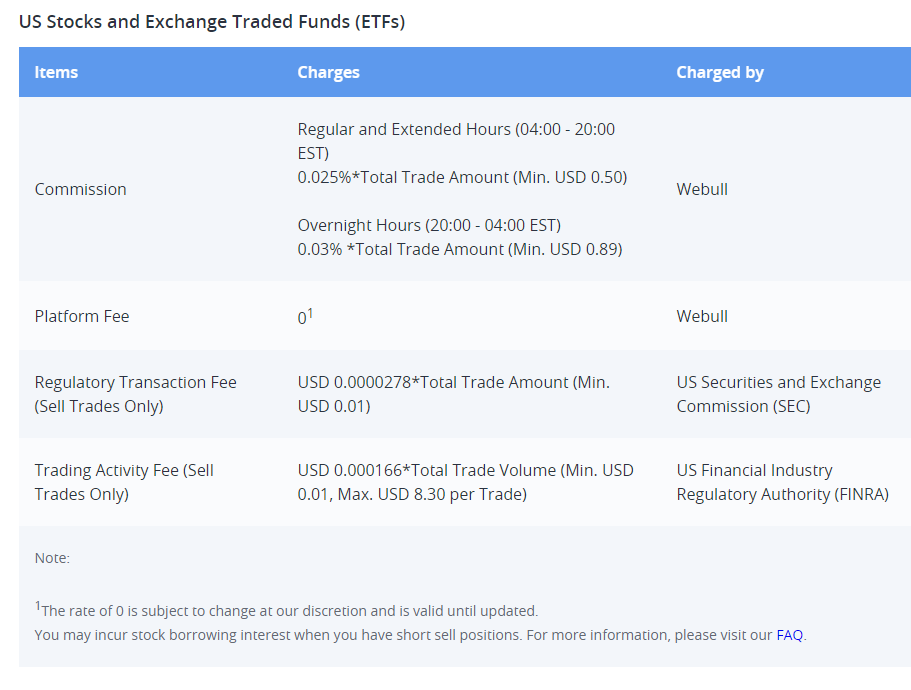

source: https://www.webull.com.sg/pricing 

In [373]:
#Function for Commission, min of 0.5

def Commission(num):
    num = num*0.00025
    if num < 0.5:
        num = 0.5
    return num

#Function for Regulatory Transaction Fee, sell side only

def RegTxnFee(num1):
    num1 = num1*0.0000278
    return num1

#Function for Trading Activity Fee, sell side only, min of 0.01, capped at 8.3

def TradingActivityFee(num2):
    num2 = min(8.3,num2*0.000166)
    if num2 < 0.01:
        num2 = 0.01
    return num2

In [374]:
#Staring Capital for all strategies
starting_amount = 10000

In [375]:
#Initialise new SPY df and columns
SPY1 = SPY.copy()
SPY1["Remaining Networth"] = 0

#Factor in transaction cost for first purhcase to get units bought
units_bought = (starting_amount-Commission(starting_amount))/SPY1.iloc[0,0]

# Calculate net worth for all rows except the last one
SPY1.iloc[0:-1, SPY1.columns.get_loc("Remaining Networth")] = SPY1["Close"].iloc[0:-1] * units_bought

# Calculate net worth for the last row before SELL transaction costs
final_networth = (SPY1["Close"].iloc[-1] * units_bought)

# Calculate net worth for the last row with SELL transaction costs
final_networth = final_networth - RegTxnFee(final_networth) - TradingActivityFee(final_networth) - Commission(final_networth)

SPY1.iloc[-1, SPY1.columns.get_loc("Remaining Networth")] = final_networth

# Print the DataFrame to verify the changes
SPY1

,Open,High,Low,Close,Adj Close,Volume,Remaining Networth
Date,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,9990.394456
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,10061.449893
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,10082.766525
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,10189.349680
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,10231.982942
...,...,...,...,...,...,...,...
2024-06-11,534.070007,537.010010,532.049988,536.950012,536.950012,36383400,122090.296972
2024-06-12,541.630005,544.119995,540.299988,541.359985,541.359985,63251300,123093.025161
2024-06-13,543.150024,543.330017,539.590027,542.450012,542.450012,44760900,123340.872665


In [376]:
#buy and hold returns
buy_and_hold_return_percent = ((SPY1.iloc[-1, 6]-starting_amount)/starting_amount)*100

print (f"The total return for buy and hold strategy is {round(buy_and_hold_return_percent,2)}%.")

The total return for buy and hold strategy is 1143.55%.


<function matplotlib.pyplot.show(close=None, block=None)>

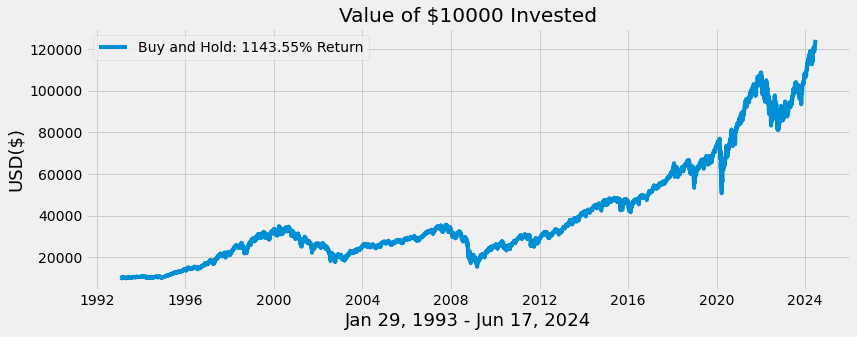

In [377]:
plt.figure(figsize=(12.2,4.5))
legend_label = f'Buy and Hold: {buy_and_hold_return_percent:.2f}% Return'
plt.plot(SPY1.index, SPY1['Remaining Networth'],label = legend_label)
plt.title ('Value of $10000 Invested')
plt.xlabel ('Jan 29, 1993 - Jun 17, 2024', fontsize = 18)
plt.ylabel ('USD($)', fontsize = 18)
plt.legend()

plt.show

### Buy at Open and Sell at Close <a id="2.2"></a>

For this strategy, we allocate 100% of remaining capital to buy SPY at the open of every trading day and close the position right when market closes, beginning with starting capital of USD10,000.00 on the first trading day of our dataset (29 Jan 1993) and ending on the last trading day of our dataset (17 Jun 2024). 

In [378]:
#Initialise new SPY df and columns
SPY2 = SPY.copy()
SPY2["Txn_Cost_Open"] = ""
SPY2["Units_Bought_at_Open"] = ""
SPY2["Txn_Cost_Close"] = ""
SPY2["Remaining Networth"] = ""

In [379]:
#First Row Calculations

#Txn costs at open
SPY2.iloc[0,6] = Commission(starting_amount)

#Units bought after txn cost
SPY2.iloc[0,7] = (starting_amount-SPY2.iloc[0,6])/SPY2.iloc[0,0]

#Closing value before txn costs
Closing_value = SPY2.iloc[0,7]*SPY2.iloc[0,3]
#Txn costs at close 
SPY2.iloc[0,8] = Commission(Closing_value) + RegTxnFee(Closing_value) + TradingActivityFee(Closing_value)

#End of day remaining value
SPY2.iloc[0,9] = Closing_value - SPY2.iloc[0,8]

In [380]:
#Rest of Rows Calculations using for loop

#Txn costs at open, using previous day's remaining value
for i in range(1,len(SPY2)):
    
    #Txn costs at open
    SPY2.iloc[i,6] = Commission(SPY2.iloc[i-1,9])
    
    #Units bought each day after txn cost
    SPY2.iloc[i,7] = (SPY2.iloc[i-1,9]-SPY2.iloc[i,6])/SPY2.iloc[i,0]

    #Closing value before txn costs each day
    Closing_value = SPY2.iloc[i,7]*SPY2.iloc[i,3]
    #Txn costs at close 
    SPY2.iloc[i,8] = Commission(Closing_value) + RegTxnFee(Closing_value) + TradingActivityFee(Closing_value)
    
    #End of day remaining value, break loop if networth goes negative
    SPY2.iloc[i,9] = Closing_value - SPY2.iloc[i,8]
    if SPY2.iloc[i,9] <= 0:
        break 

In [381]:
SPY2

,Open,High,Low,Close,Adj Close,Volume,Txn_Cost_Open,Units_Bought_at_Open,Txn_Cost_Close,Remaining Networth
Date,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,2.5,227.377399,4.433737,9985.960719
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,2.49649,227.058177,4.459003,10042.865339
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,2.510716,227.061023,4.468506,10064.268745
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,2.516067,226.584156,4.506258,10149.296233
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,2.537324,225.640226,4.506261,10149.303906
...,...,...,...,...,...,...,...,...,...,...
2024-06-11,534.070007,537.010010,532.049988,536.950012,536.950012,36383400,,,,
2024-06-12,541.630005,544.119995,540.299988,541.359985,541.359985,63251300,,,,
2024-06-13,543.150024,543.330017,539.590027,542.450012,542.450012,44760900,,,,


Seems like networth goes negative at some point in time, so we will drop all rows after that

In [382]:
SPY2.replace('', np.nan, inplace=True)
SPY2 = SPY2.dropna()

In [383]:
SPY2

,Open,High,Low,Close,Adj Close,Volume,Txn_Cost_Open,Units_Bought_at_Open,Txn_Cost_Close,Remaining Networth
Date,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,2.500000,227.377399,4.433737,9985.960719
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,2.496490,227.058177,4.459003,10042.865339
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,2.510716,227.061023,4.468506,10064.268745
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,2.516067,226.584156,4.506258,10149.296233
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,2.537324,225.640226,4.506261,10149.303906
...,...,...,...,...,...,...,...,...,...,...
2006-10-04,133.229996,135.000000,133.080002,134.919998,96.367073,80890500,0.500000,0.028543,0.510107,3.340927
2006-10-05,134.919998,135.410004,134.750000,135.179993,96.552795,60505900,0.500000,0.021056,0.510079,2.336323
2006-10-06,134.949997,135.100006,134.399994,135.009995,96.431343,64983600,0.500000,0.013607,0.510051,1.327088


<function matplotlib.pyplot.show(close=None, block=None)>

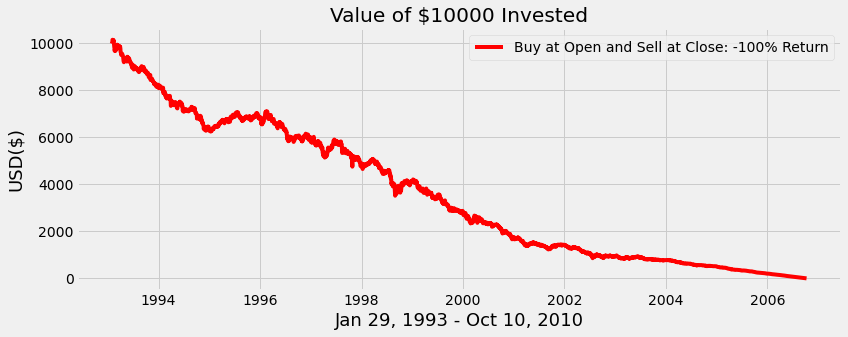

In [384]:
plt.figure(figsize=(12.2,4.5))
legend_label1 = f'Buy at Open and Sell at Close: -100% Return'
plt.plot(SPY2.index, SPY2['Remaining Networth'],label = legend_label1,color = 'red')
plt.title ('Value of $10000 Invested')
plt.xlabel ('Jan 29, 1993 - Oct 10, 2010', fontsize = 18)
plt.ylabel ('USD($)', fontsize = 18)
plt.legend()

plt.show

### Buy at Close and Sell at Open <a id="2.3"></a>

For this strategy, we allocate 100% of remaining capital to buy SPY at the close of every trading day and close the position right when market opens the next day, beginning with starting capital of USD10,000.00 on the first trading day of our dataset (29 Jan 1993) and ending on the last trading day of our dataset (17 Jun 2024). 

In [385]:
SPY3 = SPY.copy()
SPY3["Txn_Cost_Open"] = ""
SPY3["Remaining Networth"] = ""
SPY3["Txn_Cost_Close"] = ""
SPY3["Units_Bought_at_Close"] = ""


In [386]:
#First Row Calculations

#Txn costs at open
SPY3.iloc[0,6] = 0

#Remaining Networth after closing at open
SPY3.iloc[0,7] = starting_amount

#Txn costs at close (Buying)
SPY3.iloc[0,8] = Commission(starting_amount)

#Units bought at close after txn cost
SPY3.iloc[0,9] = (starting_amount-SPY3.iloc[0,8])/SPY3.iloc[0,3]



In [387]:
#Rest of Rows (excluding last row) Calculations using for loop

#Txn costs at open, using previous day's remaining value
for i in range(1,len(SPY3)-1):
    #Opening value before txn costs each day
    Opening_value = SPY3.iloc[i-1,9]*SPY3.iloc[i,0]
    #Txn costs at open(Selling)
    SPY3.iloc[i,6] = Commission(Opening_value) + RegTxnFee(Opening_value) + TradingActivityFee(Opening_value)
    
    #Remaining Networth after closing at open
    SPY3.iloc[i,7] = Opening_value - SPY3.iloc[i,6]
    if SPY3.iloc[i,7] <= 0:
        break 
    
    #Txn costs at close (Buying)
    SPY3.iloc[i,8] = Commission(SPY3.iloc[i,7])

    #Units bought at close after txn cost
    SPY3.iloc[i,9] = (SPY3.iloc[i,7]-SPY3.iloc[i,8])/SPY3.iloc[i,3]


In [388]:
SPY3

,Open,High,Low,Close,Adj Close,Volume,Txn_Cost_Open,Remaining Networth,Txn_Cost_Close,Units_Bought_at_Close
Date,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,0,10000,2.5,227.539118
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,4.440046,10000.170551,2.500043,225.936057
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,4.433833,9986.176174,2.496544,225.142881
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,4.437002,9993.314058,2.498329,222.947073
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,4.449384,10021.201826,2.5053,222.637701
...,...,...,...,...,...,...,...,...,...,...
2024-06-11,534.070007,537.010010,532.049988,536.950012,536.950012,36383400,,,,
2024-06-12,541.630005,544.119995,540.299988,541.359985,541.359985,63251300,,,,
2024-06-13,543.150024,543.330017,539.590027,542.450012,542.450012,44760900,,,,


Again, networth goes negative at some point in time, so we will drop all rows after that

In [389]:
SPY3.replace('', np.nan, inplace=True)
SPY3 = SPY3.dropna()

In [390]:
SPY3

,Open,High,Low,Close,Adj Close,Volume,Txn_Cost_Open,Remaining Networth,Txn_Cost_Close,Units_Bought_at_Close
Date,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,0.000000,10000.000000,2.500000,227.539118
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,4.440046,10000.170551,2.500043,225.936057
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,4.433833,9986.176174,2.496544,225.142881
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,4.437002,9993.314058,2.498329,222.947073
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,4.449384,10021.201826,2.505300,222.637701
...,...,...,...,...,...,...,...,...,...,...
2019-02-05,272.440002,273.440002,271.880005,273.100006,250.900192,79552800,0.510150,4.872831,0.500000,0.016012
2019-02-06,272.790009,273.339996,271.920013,272.739990,250.569489,58347800,0.510121,3.857746,0.500000,0.012311
2019-02-07,270.940002,271.549988,268.290009,270.140015,248.180832,95482000,0.510093,2.825493,0.500000,0.008608


<function matplotlib.pyplot.show(close=None, block=None)>

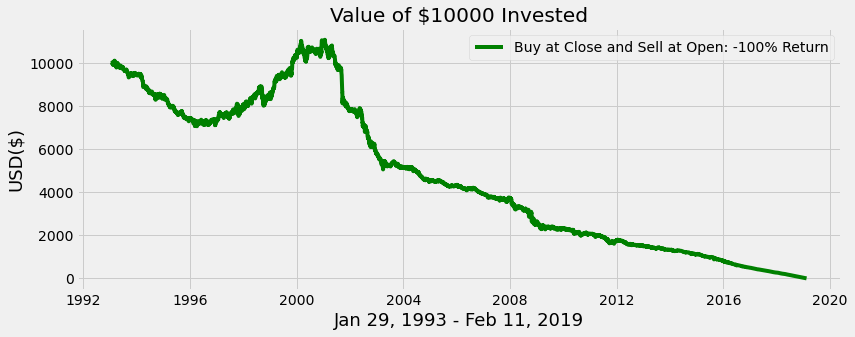

In [391]:
plt.figure(figsize=(12.2,4.5))
legend_label2 = f'Buy at Close and Sell at Open: -100% Return'
plt.plot(SPY3.index, SPY3['Remaining Networth'],label = legend_label2,color = 'green')
plt.title ('Value of $10000 Invested')
plt.xlabel ('Jan 29, 1993 - Feb 11, 2019', fontsize = 18)
plt.ylabel ('USD($)', fontsize = 18)
plt.legend()

plt.show

### Performance <a id="2.4"></a>

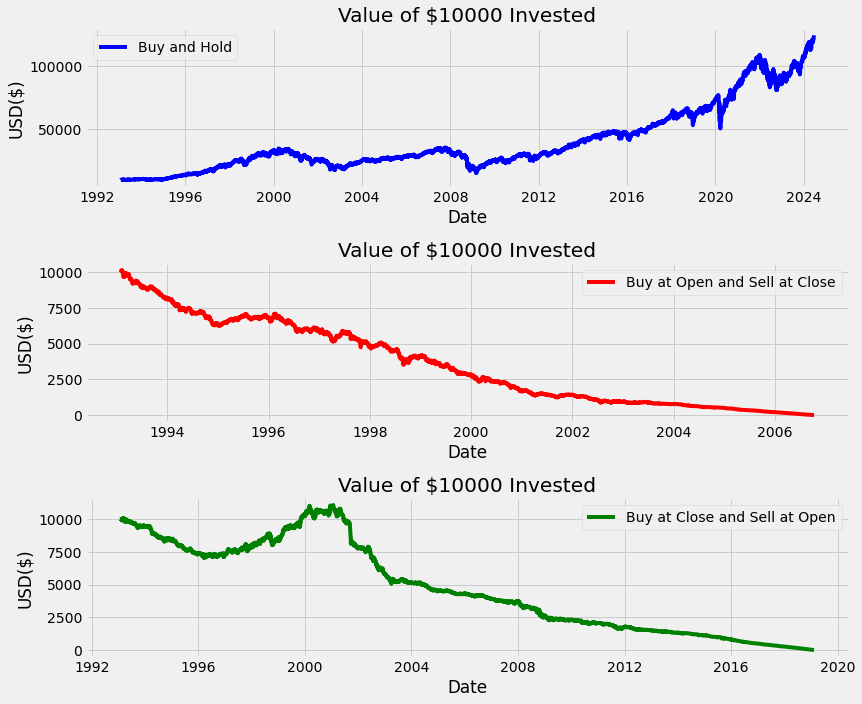

In [392]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12.2, 10))

# Plot for SPY1
ax1.plot(SPY1.index, SPY1['Remaining Networth'], label='Buy and Hold', color='blue')
ax1.set_title('Value of $10000 Invested')
ax1.set_xlabel('Date')
ax1.set_ylabel('USD($)')
ax1.legend()

# Plot for SPY2
ax2.plot(SPY2.index, SPY2['Remaining Networth'], label='Buy at Open and Sell at Close', color='red')
ax2.set_title('Value of $10000 Invested')
ax2.set_xlabel('Date')
ax2.set_ylabel('USD($)')
ax2.legend()

# Plot for SPY3
ax3.plot(SPY3.index, SPY3['Remaining Networth'], label='Buy at Close and Sell at Open', color='green')
ax3.set_title('Value of $10000 Invested')
ax3.set_xlabel('Date')
ax3.set_ylabel('USD($)')
ax3.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

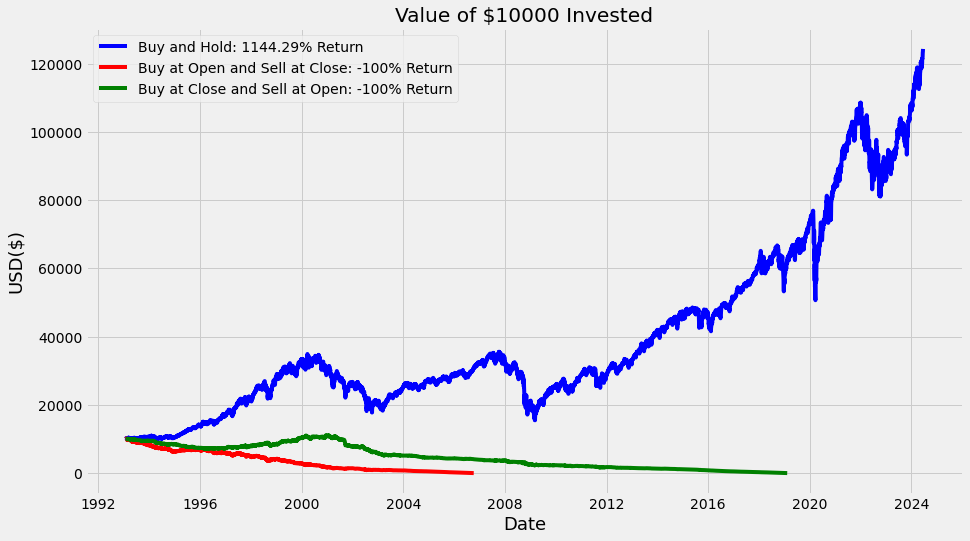

In [414]:
plt.figure(figsize=(14, 8)) 

# Plot the first dataset (e.g., SPY1)
legend_label1 = f'Buy and Hold: {buy_and_hold_return_percent:.2f}% Return'
plt.plot(SPY1.index, SPY1['Remaining Networth'], label=legend_label1, color='blue')

# Plot the second dataset (e.g., SPY2)
legend_label2 = f'Buy at Open and Sell at Close: -100% Return'
plt.plot(SPY2.index, SPY2['Remaining Networth'], label=legend_label2, color='red')

# Plot the third dataset (e.g., SPY3)
legend_label3 = f'Buy at Close and Sell at Open: -100% Return'
plt.plot(SPY3.index, SPY3['Remaining Networth'], label=legend_label3, color='green')

# Set the title and labels
plt.title('Value of $10000 Invested')
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD($)', fontsize=18)

# Display the legend
plt.legend()

# Show the plot
plt.show()

## Strategies (without txn costs) <a id="chapter3"></a>

### Buy and Hold <a id="3.1"></a>

In [394]:
#Initialise new SPY df and columns
SPY11 = SPY.copy()
SPY11["Remaining Networth"] = 0

# Calculate net worth for all rows except the last one
units_bought = starting_amount/SPY11.iloc[0,0]
SPY11.iloc[0:, SPY11.columns.get_loc("Remaining Networth")] = SPY11["Close"].iloc[0:] * units_bought

In [395]:
SPY11

,Open,High,Low,Close,Adj Close,Volume,Remaining Networth
Date,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,9992.892679
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,10063.965885
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,10085.287846
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,10191.897655
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,10234.541578
...,...,...,...,...,...,...,...
2024-06-11,534.070007,537.010010,532.049988,536.950012,536.950012,36383400,122120.827178
2024-06-12,541.630005,544.119995,540.299988,541.359985,541.359985,63251300,123123.806112
2024-06-13,543.150024,543.330017,539.590027,542.450012,542.450012,44760900,123371.715593


In [396]:
#buy and hold returns
buy_and_hold_return_percent = ((SPY11.iloc[-1, 6]-starting_amount)/starting_amount)*100

print (f"The total return for buy and hold strategy is {round(buy_and_hold_return_percent,2)}%.")

The total return for buy and hold strategy is 1144.29%.


<function matplotlib.pyplot.show(close=None, block=None)>

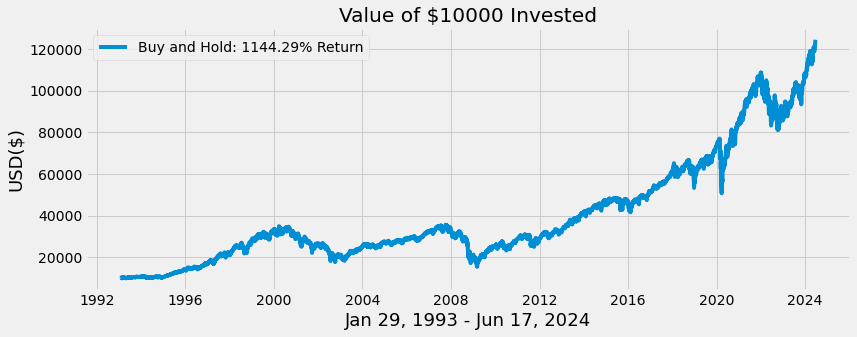

In [397]:
plt.figure(figsize=(12.2,4.5))
legend_label = f'Buy and Hold: {buy_and_hold_return_percent:.2f}% Return'
plt.plot(SPY1.index, SPY1['Remaining Networth'],label = legend_label)
plt.title ('Value of $10000 Invested')
plt.xlabel ('Jan 29, 1993 - Jun 17, 2024', fontsize = 18)
plt.ylabel ('USD($)', fontsize = 18)
plt.legend()

plt.show

### Buy at Open and Sell at Close <a id="3.2"></a>

In [398]:
#Initialise new SPY df and columns
SPY22 = SPY.copy()
SPY22["Units_Bought_at_Open"] = ""
SPY22["Remaining Networth"] = ""

In [399]:
#First Row Calculations

#Units bought at open
SPY22.iloc[0,6] = starting_amount/SPY22.iloc[0,0]

#Closing value 
SPY22.iloc[0,7] = SPY22.iloc[0,6]*SPY22.iloc[0,3]

In [400]:
#Rest of Rows Calculations using for loop

for i in range(1,len(SPY22)):
    
    #Units bought each day after txn cost
    SPY22.iloc[i,6] = SPY22.iloc[i-1,7]/SPY22.iloc[i,0]
    
    #End of day remaining value, break loop if networth goes negative
    SPY22.iloc[i,7] = SPY22.iloc[i,6]*SPY22.iloc[i,3]
    if SPY22.iloc[i,7] <= 0:
        break 

In [401]:
SPY22

,Open,High,Low,Close,Adj Close,Volume,Units_Bought_at_Open,Remaining Networth
Date,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,227.434257,9992.892679
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,227.272612,10056.813102
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,227.433229,10085.242255
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,227.113126,10177.506963
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,226.323991,10184.579588
...,...,...,...,...,...,...,...,...
2024-06-11,534.070007,537.010010,532.049988,536.950012,536.950012,36383400,21.654959,11627.630483
2024-06-12,541.630005,544.119995,540.299988,541.359985,541.359985,63251300,21.467848,11621.833734
2024-06-13,543.150024,543.330017,539.590027,542.450012,542.450012,44760900,21.397097,11606.85551


In [402]:
#Buy at Open and Sell at Close 
Buy_at_Open_Sell_at_Close_return_percent = ((SPY22.iloc[-1, 7]-starting_amount)/starting_amount)*100

print (f"The total return for buy and hold strategy is {round(Buy_at_Open_Sell_at_Close_return_percent,2)}%.")

The total return for buy and hold strategy is 17.55%.


<function matplotlib.pyplot.show(close=None, block=None)>

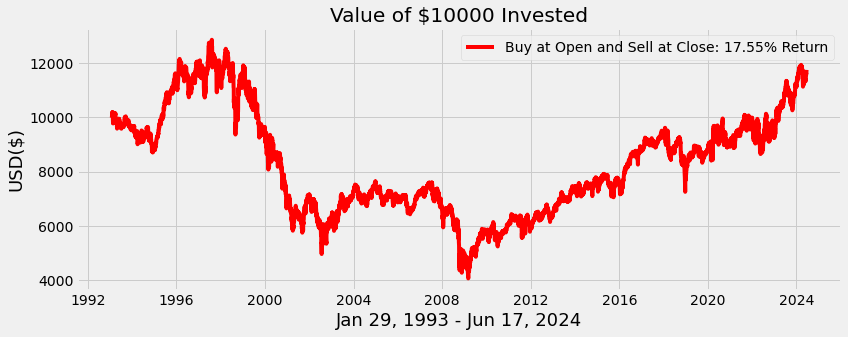

In [403]:
plt.figure(figsize=(12.2,4.5))
legend_label1 = f'Buy at Open and Sell at Close: {Buy_at_Open_Sell_at_Close_return_percent:.2f}% Return'
plt.plot(SPY22.index, SPY22['Remaining Networth'],label = legend_label1,color = 'red')
plt.title ('Value of $10000 Invested')
plt.xlabel ('Jan 29, 1993 - Jun 17, 2024', fontsize = 18)
plt.ylabel ('USD($)', fontsize = 18)
plt.legend()

plt.show

### Buy at Close and Sell at Open <a id="3.3"></a>

In [404]:
SPY33 = SPY.copy()
SPY33["Remaining Networth"] = ""
SPY33["Units_Bought_at_Close"] = ""


In [405]:
#First Row Calculations

#Txn costs at open
SPY33.iloc[0,6] = starting_amount

#Units bought at close 
SPY33.iloc[0,7] = (starting_amount/SPY33.iloc[0,3])



In [406]:
#Rest of Rows (excluding last row) Calculations using for loop

#Txn costs at open, using previous day's remaining value
for i in range(1,len(SPY33)):
    
    #Remaining Networth after closing at open, break loop if networth goes negative
    SPY33.iloc[i,6] = SPY33.iloc[i-1,7]*SPY33.iloc[i,0]
    if SPY33.iloc[i,6] <= 0:
        break 

    #Units bought at close 
    SPY33.iloc[i,7] = (SPY33.iloc[i,6]/SPY33.iloc[i,3])


In [407]:
SPY33

,Open,High,Low,Close,Adj Close,Volume,Remaining Networth,Units_Bought_at_Close
Date,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,24.763744,1003200,10000,227.596017
1993-02-01,43.968750,44.250000,43.968750,44.250000,24.939867,480500,10007.112376,226.149432
1993-02-02,44.218750,44.375000,44.125000,44.343750,24.992701,201300,10000.045206,225.511943
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.256908,529400,10014.139702,223.467553
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.362572,531500,10049.056507,223.312367
...,...,...,...,...,...,...,...,...
2024-06-11,534.070007,537.010010,532.049988,536.950012,536.950012,36383400,105026.408742,195.598112
2024-06-12,541.630005,544.119995,540.299988,541.359985,541.359985,63251300,105941.806539,195.695673
2024-06-13,543.150024,543.330017,539.590027,542.450012,542.450012,44760900,106292.109425,195.948211


In [408]:
#Buy at Close and Sell at Open 
Buy_at_Close_Sell_at_Open_return_percent = ((SPY33.iloc[-1, 6]-starting_amount)/starting_amount)*100

print (f"The total return for buy and hold strategy is {round(Buy_at_Close_Sell_at_Open_return_percent,2)}%.")

The total return for buy and hold strategy is 958.48%.


<function matplotlib.pyplot.show(close=None, block=None)>

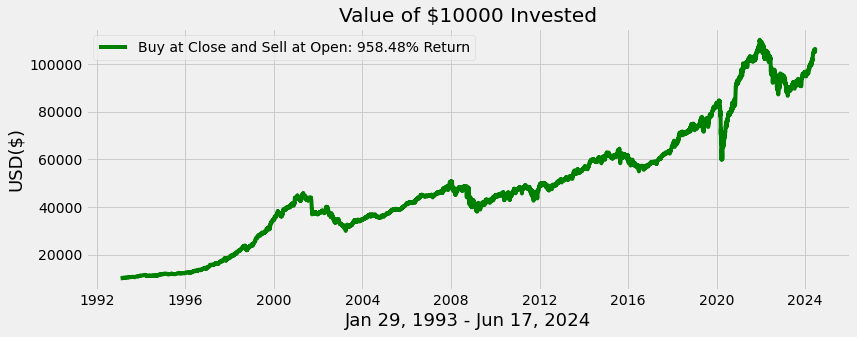

In [409]:
plt.figure(figsize=(12.2,4.5))
legend_label1 = f'Buy at Close and Sell at Open: {Buy_at_Close_Sell_at_Open_return_percent:.2f}% Return'
plt.plot(SPY22.index, SPY33['Remaining Networth'],label = legend_label1,color = 'Green')
plt.title ('Value of $10000 Invested')
plt.xlabel ('Jan 29, 1993 - Jun 17, 2024', fontsize = 18)
plt.ylabel ('USD($)', fontsize = 18)
plt.legend()

plt.show

### Performance <a id="3.4"></a>

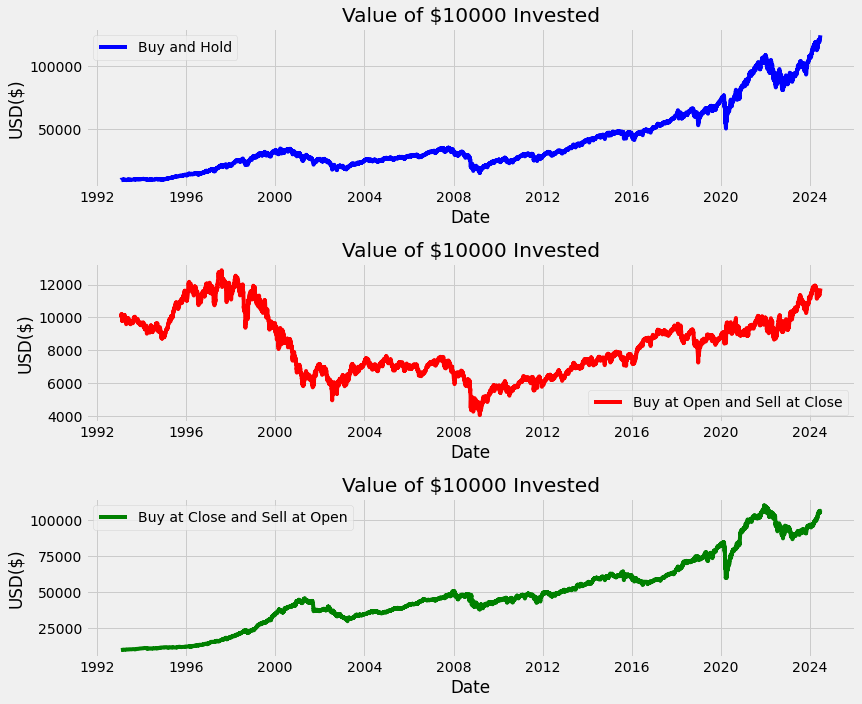

In [410]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12.2, 10))

# Plot for SPY11
ax1.plot(SPY11.index, SPY11['Remaining Networth'], label='Buy and Hold', color='blue')
ax1.set_title('Value of $10000 Invested')
ax1.set_xlabel('Date')
ax1.set_ylabel('USD($)')
ax1.legend()

# Plot for SPY22
ax2.plot(SPY22.index, SPY22['Remaining Networth'], label='Buy at Open and Sell at Close', color='red')
ax2.set_title('Value of $10000 Invested')
ax2.set_xlabel('Date')
ax2.set_ylabel('USD($)')
ax2.legend()

# Plot for SPY33
ax3.plot(SPY33.index, SPY33['Remaining Networth'], label='Buy at Close and Sell at Open', color='green')
ax3.set_title('Value of $10000 Invested')
ax3.set_xlabel('Date')
ax3.set_ylabel('USD($)')
ax3.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

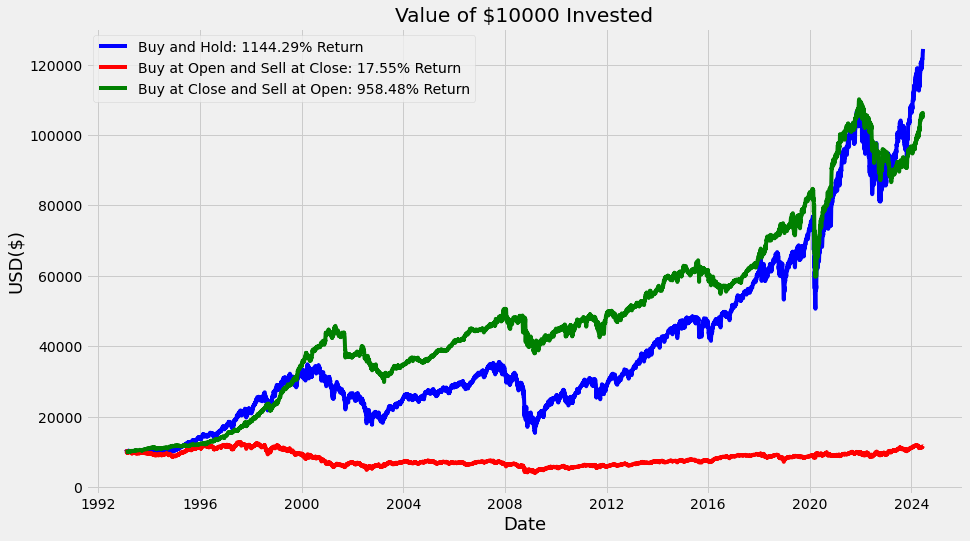

In [411]:
plt.figure(figsize=(14, 8)) 

# Plot the first dataset (e.g., SPY11)
legend_label1 = f'Buy and Hold: {buy_and_hold_return_percent:.2f}% Return'
plt.plot(SPY11.index, SPY11['Remaining Networth'], label=legend_label1, color='blue')

# Plot the second dataset (e.g., SPY22)
legend_label2 = f'Buy at Open and Sell at Close: {Buy_at_Open_Sell_at_Close_return_percent:.2f}% Return'
plt.plot(SPY22.index, SPY22['Remaining Networth'], label=legend_label2, color='red')

# Plot the third dataset (e.g., SPY33)
legend_label3 = f'Buy at Close and Sell at Open: {Buy_at_Close_Sell_at_Open_return_percent:.2f}% Return'
plt.plot(SPY33.index, SPY33['Remaining Networth'], label=legend_label3, color='green')

# Set the title and labels
plt.title('Value of $10000 Invested')
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD($)', fontsize=18)

# Display the legend
plt.legend()

# Show the plot
plt.show()